In [1]:
##Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##importing the dataset
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [3]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
##Checking for any null values
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Checking for Invalid values

In [8]:
##Checking for invalid values
mall_data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
mall_data['Age'].value_counts()

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

In [10]:
mall_data['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [11]:
mall_data['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

### Visual Analysis

C:\Users\Ayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


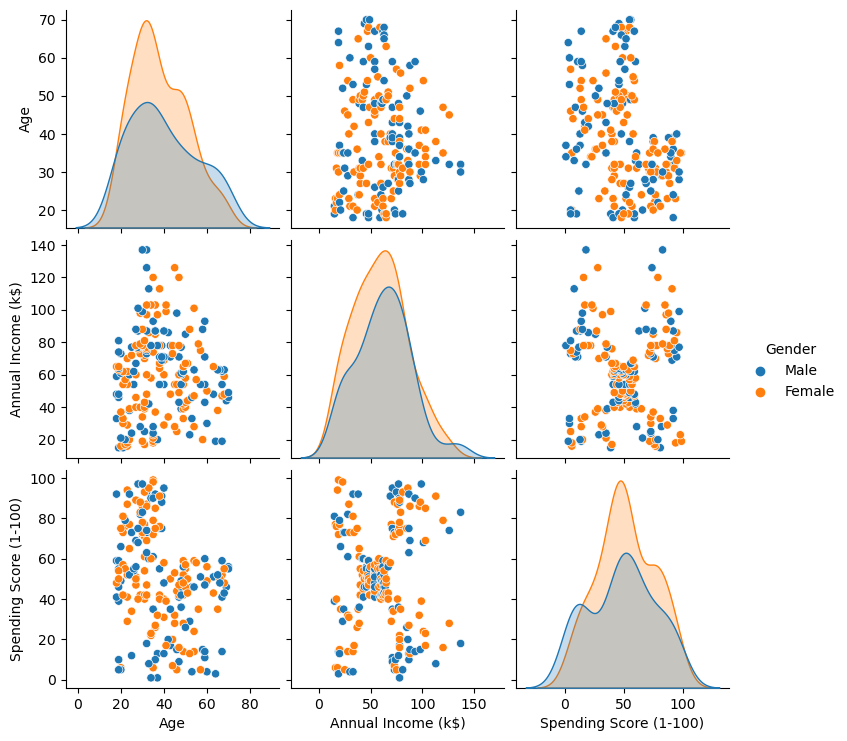

In [13]:
sns.pairplot(mall_data.drop('CustomerID', axis=1), hue='Gender')

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

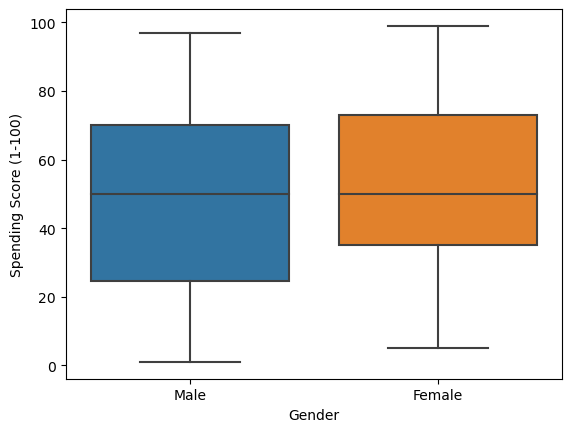

In [14]:
##Boxplot
sns.boxplot(data=mall_data, x='Gender', y='Spending Score (1-100)')

### Data Preprocessing

In [16]:
mall_data.drop(['CustomerID', 'Gender'], axis=1 ,inplace=True)

In [17]:
##importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [18]:
##Scaling the dataset
scaler = StandardScaler()
data = scaler.fit_transform(mall_data)

### Applying K-Means Clustering

In [26]:
from sklearn.datasets import make_blobs
mall_data, _ = make_blobs(n_samples=300,  random_state=42)

In [27]:
# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(mall_data)

C:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [28]:
# Predict clusters and find centroids
y_kmeans = kmeans_model.predict(mall_data)
centroids = kmeans_model.cluster_centers_

Text(0.5, 1.0, 'K-Means Clustering')

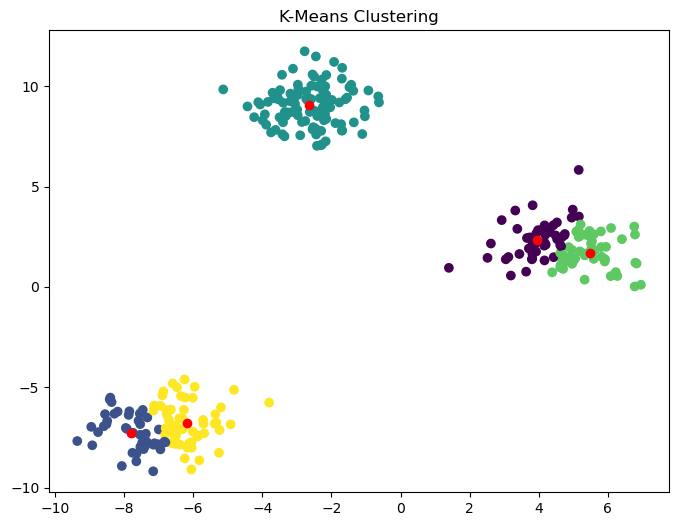

In [29]:
# Visualize clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points with different colors based on their cluster assignments
plt.scatter(mall_data[:, 0], mall_data[:, 1], c=y_kmeans )

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red')

plt.title('K-Means Clustering')

### Accuracy of KMeans model